# CME 257  Homework 3
Sarah Hensley 

An introduction to the "Distributions" package

In [1]:
VERSION

v"1.2.0"

In [2]:
# install Distributions, a package for probability distributions
using Pkg
Pkg.add("Distributions")
Pkg.add("Random")
Pkg.add("Plots")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %]  49.0 % [========================================>]  98.4 % Resolving package versions...
 Installed FastClosures ─ v0.3.2
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [9aa1b823] ↑ FastClosures v0.3.1 ⇒ v0.3.2
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [3]:
using Distributions

# create a Gaussian
d = Normal(10,1)

Normal{Float64}(μ=10.0, σ=1.0)

In [4]:
# sample from the distribution
using Random
x = rand(d, 5)

5-element Array{Float64,1}:
 10.876071312695979
 10.195096705418312
  9.04955056194015 
 10.152399552626331
  8.41964832677609 

In [5]:
# fit to a distribution and retrieve its parameters
x = rand(Normal(0,10),100)
fit(Normal, x)

Normal{Float64}(μ=-0.003361175889870136, σ=10.669998527434208)

In [6]:
# get statistics about a distribution
quantile.(d,[0.05,0.5,0.95])

3-element Array{Float64,1}:
  8.355146373048527
 10.0              
 11.644853626951472

In [7]:
# look at statistics of a binomial random variable
b = Binomial(16,0.5)

@show ntrials(b)
@show entropy(b, 2) # base 2 entropy
@show var(b)
;

ntrials(b) = 16
entropy(b, 2) = 3.0465495594353666
var(b) = 4.0


n = ZeroMeanFullNormal(
dim: 2
μ: [0.0, 0.0]
Σ: [4.0 1.0; 1.0 2.0]
)



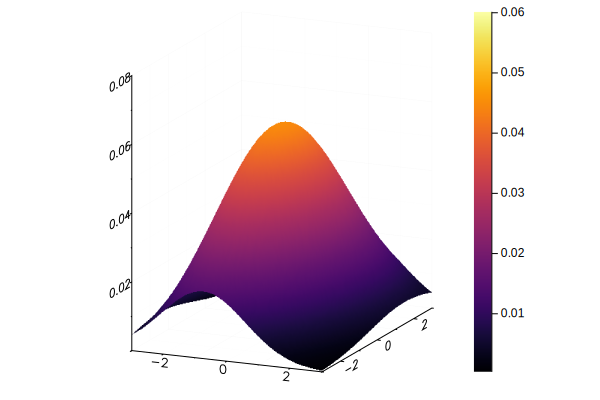

In [39]:
# plot a multivariate normal
using Plots

# create a multivariate normal
sigma = [4.0 1.0; 1.0 2.0]
n = MvNormal(sigma)
@show n

# get the pdf at a number of points
# note that each column is treated as one point at which to evaluate the pdf
v = -3.0 : 0.05 : 3.0
pdfGrid = zeros(121,121)
for (i, value) in enumerate(v)
    pdfGrid[:,i] = pdf(n, [v repeat([value], 121)]')
end


plot(v, v, pdfGrid,st=:surface)